<a href="https://colab.research.google.com/github/Glcan22/GSC/blob/main/isolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

data = pd.read_csv('/content/0404_01.CSV')  # Dosya adını kontrol ederek güncelle


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Ölçeklendirme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['C1 in V', 'C2 in V', 'C3 in V', 'C4 in A']])

# Mini-batch işlemi
batch_size = 100000
total_batches = len(data) // batch_size

anomalies = []

for i in range(total_batches + 1):
    batch = scaled_data[i * batch_size:(i + 1) * batch_size]
    if len(batch) > 0:
        model = IsolationForest(contamination=0.01, random_state=42)
        predictions = model.fit_predict(batch)
        anomalies.extend(np.where(predictions == -1)[0] + i * batch_size)


In [5]:
data['is_anomaly'] = False
data.loc[anomalies, 'is_anomaly'] = True
data[data['is_anomaly']].to_csv('/content/anomalies.csv', index=False)


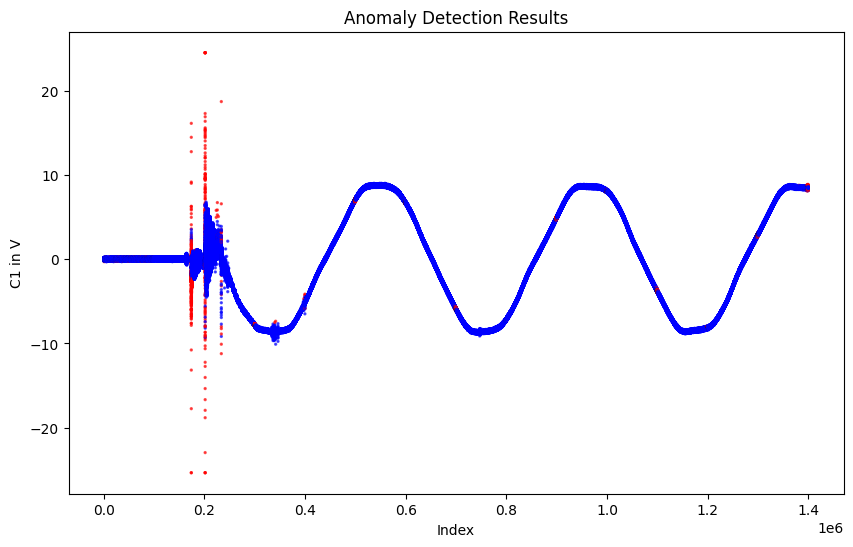

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['C1 in V'], c=data['is_anomaly'].map({True: 'red', False: 'blue'}), alpha=0.6, s=2)
plt.title('Anomaly Detection Results')
plt.xlabel('Index')
plt.ylabel('C1 in V')
plt.show()


In [ ]:
from google.colab import files
files.download('/content/anomalies.csv')
